# NYU PUI - HOMEWORK 4 - Part 1

Submitted by Zoe Martiniak (zem232)

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Choose which distributions to use 

In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']

Choose a mean

In [3]:
mymean = 100

### Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [4]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

Text(0.5,1,'Chi Square')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


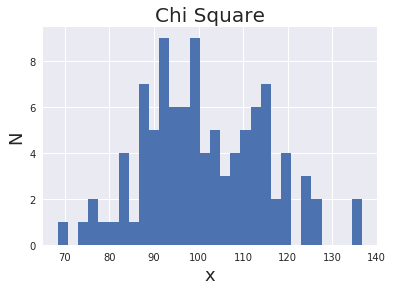

In [61]:
md = {}
# md is an empty dictionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N',fontsize=18)
pl.xlabel('x',fontsize=18)
pl.title('Chi Square',fontsize=20)

### Figure 1: Chi sq distribution: df = 100, N=100

In [6]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 101.01, standard deviation: 15.86


In [10]:
mysize = (np.random.rand(100) * 1000).astype(int)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


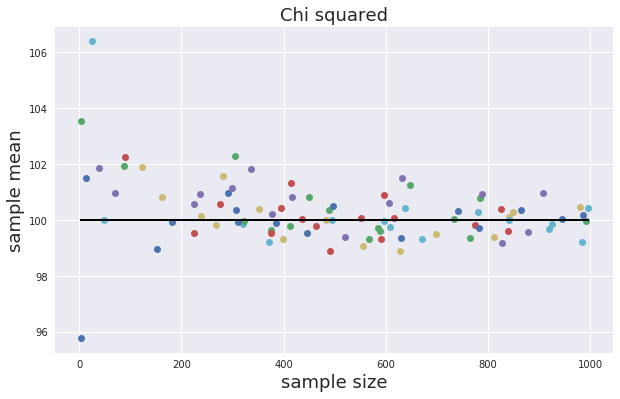

In [11]:
md['chisq'] = {} 
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: Chi Square Distributions
This figure illustrates how the larger the sample size, the smaller the standard deviation and the closer to the true mean. 

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


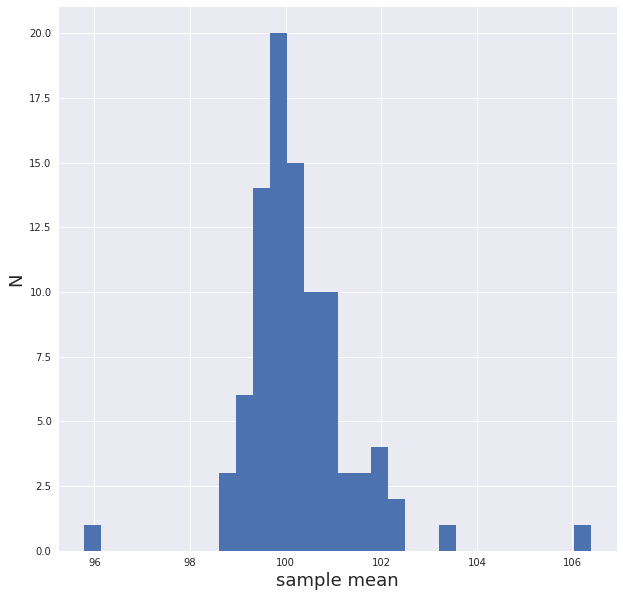

In [12]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: Chi Square HIstogram
Histogram illustrates how when N increases, the sample mean becomes closer to the true mean.

# Normal distribution


Text(0.5,1,'Normal')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


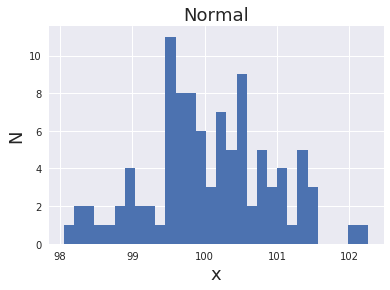

In [62]:
distributions = ['lnorm']
df=mymean
md={}
md['lnorm']=np.random.normal(df,size=100)
pl.hist(md['lnorm'],bins=30)
pl.ylabel('N',fontsize=18)
pl.xlabel('x',fontsize=18)
pl.title('Normal',fontsize=18)

### FIgure 4: Normal distribution with scale=100, size=100 

In [14]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['lnorm'].mean(), md['lnorm'].std()))

Chisq mean: 100.11, standard deviation: 1.19


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


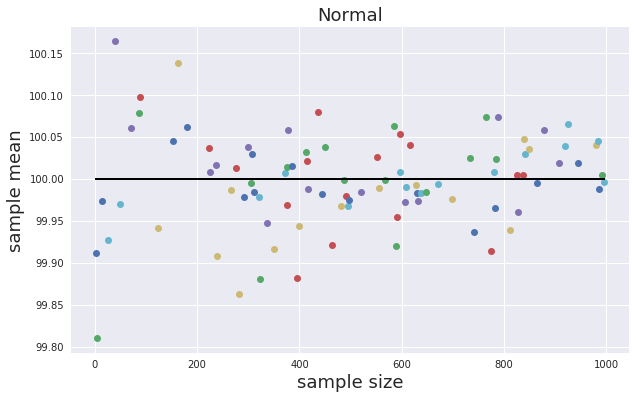

In [15]:
md['lnorm'] = {}

for n in mysize:
    md['lnorm'][n] = np.random.normal(df, size = n)
md['lnorm']['means'] = {}
axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
        #and plot it
        axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.set_title('Normal', fontsize=18)
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 5: Normal Distribution Sample Mean
Already, the chi-squared distribution produces a mean closer to the true mean when compared to chi-squared distributions. The larger the sample size, the closer the sample mean is to the true mean.

Text(0.5,1,'Normal Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


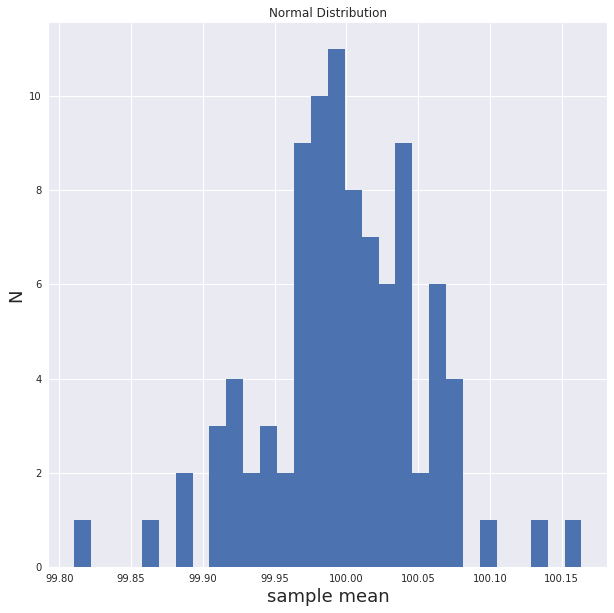

In [16]:
allmeans = list(md['lnorm']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Normal Distribution',fontsize=20)

### Figure 6: Normal (Gaussian) Square HIstogram

# Poisson distribution

Text(0.5,1,'Poisson')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


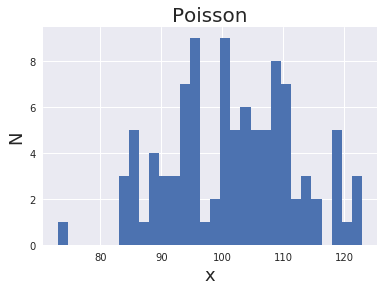

In [63]:
distributions = ['pois']
df=mymean
md={}
md['pois']=np.random.poisson(df,size=100)
pl.hist(md['pois'],bins=30)
pl.ylabel('N',fontsize=18)
pl.xlabel('x',fontsize=18)
pl.title('Poisson',fontsize=20)

### FIgure7: Poisson Distribution: lamda=100, size=100

In [64]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson mean: 101.59, standard deviation: 10.36


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


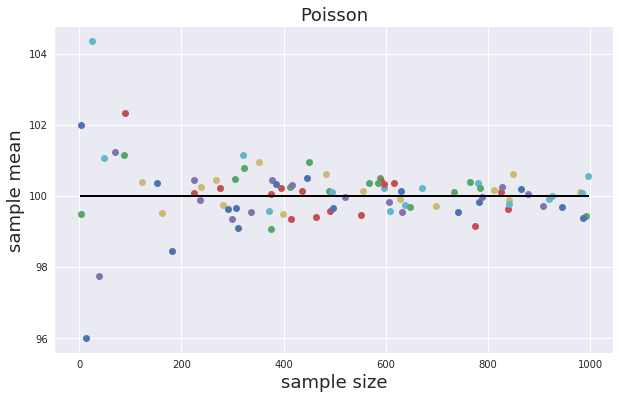

In [65]:
md['pois'] = {}

for n in mysize:
    md['pois'][n] = np.random.poisson(df, size = n)
md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 8: Poisson Mean Distribution

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


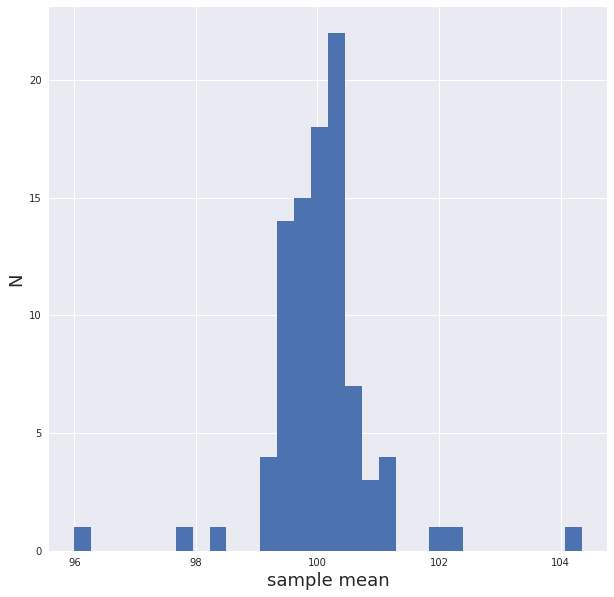

In [66]:
allmeans = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### FIgure 9: Poisson Mean Histogram

# Binomial distribution

Text(0.5,1,'Binomial')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


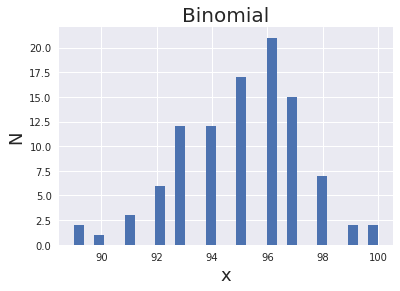

In [70]:
distributions = ['binomial']
df=mymean
md={}
md['binomial']=np.random.binomial(df,0.95,size=100)
pl.hist(md['binomial'],bins=30)
pl.ylabel('N',fontsize=18)
pl.xlabel('x',fontsize=18)
pl.title('Binomial',fontsize=20)

### FIgure 10: Binomial Distribution: n=100, p=0.95, size=100

In [71]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 95.07, standard deviation: 2.20


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


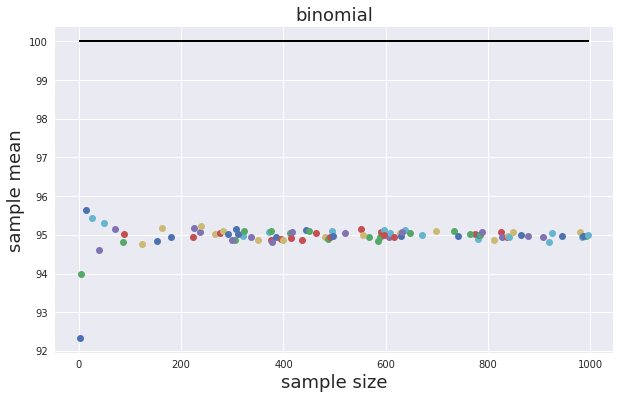

In [72]:
md['binomial'] = {}

for n in mysize:
    md['binomial'][n] = np.random.binomial(df, 0.95, size = n)
md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### FIgure 11: Binomial Distribution

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


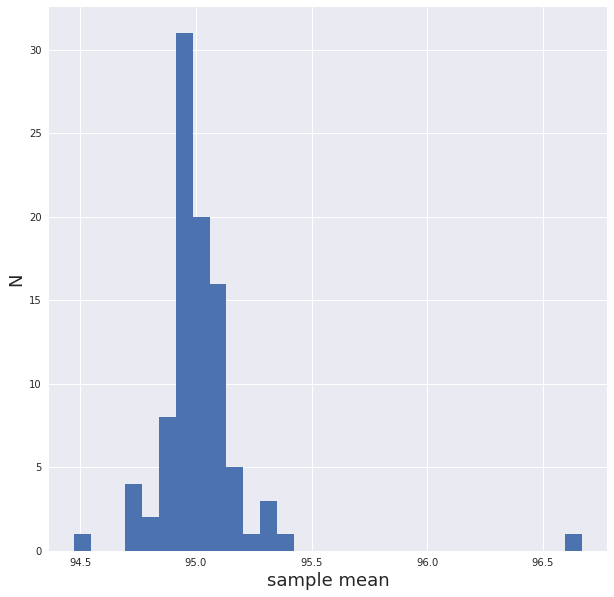

In [31]:
allmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### FIgure 12: Binomial Histogram

# Rayleigh distribution

Text(0.5,1,'Rayleigh')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


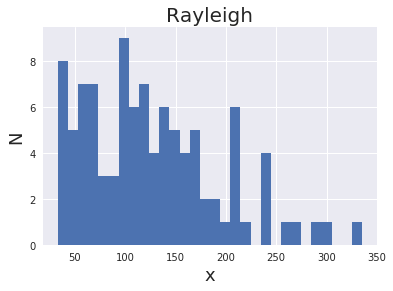

In [76]:
distributions = ['rayleigh']
df=mymean
md={}
md['rayleigh']=np.random.rayleigh(df,size=100)
pl.hist(md['rayleigh'],bins=30)
pl.ylabel('N',fontsize=18)
pl.xlabel('x',fontsize=18)
pl.title('Rayleigh',fontsize=20)

### FIgure 13: Rayleigh Distribution: scale=100, size=100

In [77]:
print ("Rayleigh mean: %.2f, standard deviation: %.2f"%(md['rayleigh'].mean(), md['rayleigh'].std()))

Rayleigh mean: 127.04, standard deviation: 66.58


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


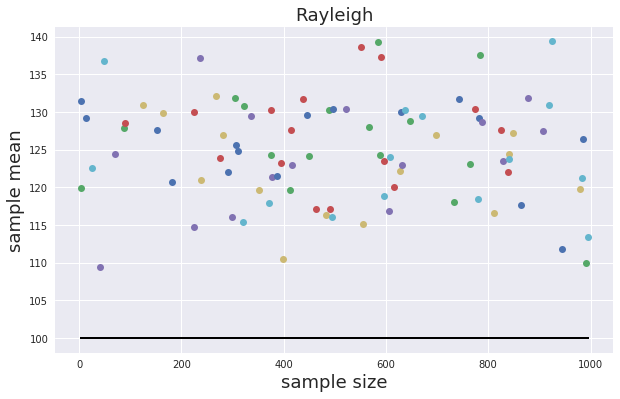

In [78]:
md['rayleigh'] = {}

for n in mysize:
    md['rayleigh'][n] = np.random.rayleigh(df,size=100)
md['rayleigh']['means'] = {}
axrayleigh_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['rayleigh']:
    if not type(nn) == str:
        md['rayleigh']['means'][nn] = md['rayleigh'][nn].mean()
        #and plot it
        axrayleigh_mu_n.plot(nn, md['rayleigh']['means'][nn], 'o')
        axrayleigh_mu_n.set_xlabel('sample size', fontsize=18)
        axrayleigh_mu_n.set_ylabel('sample mean', fontsize=18)
        axrayleigh_mu_n.set_title('Rayleigh', fontsize=18)
        axrayleigh_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### FIgure 14: Rayleigh Mean Distribution

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


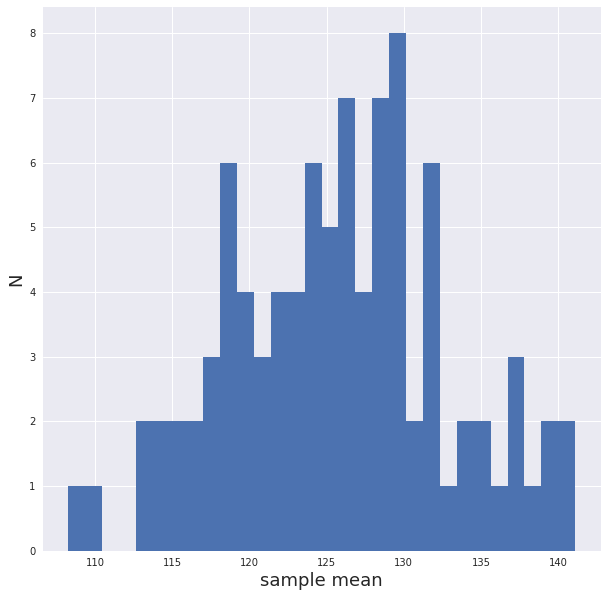

In [56]:
allmeans = list(md['rayleigh']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### FIgure 15: Rayleigh Mean Histogram